In [1]:
import math
import random as rd

### Formula's initialitation

In [2]:
def rumus(x1, x2, a):
    hasil = (4 - (2.1 * (x1**2)) + ((x1**4)/3)) * (x1**2) + (x1*x2) + ((-4 + (4*(x2**2))) * (x2**2))
    return 1/hasil+a

In [22]:
X1 =  0.2125984251968509
X2 =  0.14173228346456712
hasil = (4 - (2.1 * (X1**2)) + ((X1**4)/3)) * (X1**2) + (X1*X2) + ((-4 + (4*(X2**2))) * (X2**2))
print(hasil)

0.127927134989952


### Formula to decode the kromosom 

In [4]:
def decodeRumus3(x):
    xmin = -3
    xmax = 3
    return (xmin + ((x - 0) / (127 - 0)) * (xmax - xmin))
def decodeRumus2(x):
    xmin = -2
    xmax = 2
    return (xmin + ((x - 0) / (127 - 0)) * (xmax - xmin))

### Individu

In [5]:
class Individu():
    def __init__(self):
        # length of
        self.genes = []
        self.xFenotype = 0
        self.yFenotype = 0
        # Kromosom's initialitation with 14 dna
        for i in range (kromosom):
            self.genes.append(rd.randint(0,1))
    
    # get Kromosom
    def getGene(self):
        return self.genes
    #set Kromosom
    def setGene(self, new_gene):
        self.genes = new_gene
    # Decode kromosom
    def decodeKromosom(self):
        i = 0
        gen = self.genes
        idx = halfKromosom
        xGenotype = 0 
        yGenotype = 0
        
        while i < halfKromosom :
            if gen[i] == 1:
                xGenotype = xGenotype + (2**i)
            if gen[idx] == 1:
                yGenotype = yGenotype + (2**i)
            i += 1
            idx += 1
            
        self.xFenotype = decodeRumus3(xGenotype)
        self.yFenotype = decodeRumus2(yGenotype)

### Population

In [6]:
class Population():
    def __init__(self):
        self.populationx = []
        self.populationy = []
        self.population = []
        # Make a population with 10 individu
   
    def insertIndividu(self, new):
        self.population.append(new)
        new.decodeKromosom()
        self.populationx.append(new.xFenotype)
        self.populationy.append(new.yFenotype)

        
    def getPopulation(self):
        return self.population

##### Get the fitness for every individu

In [7]:
def getTheFitness(newPop, a):
    fitness = []
    for i in range (len(newPop.population)):
        print(" X : ", newPop.populationx[i], "Y : ", newPop.populationy[i])
        fitness.append([rumus(newPop.populationx[i], newPop.populationy[i], a), newPop.population[i].getGene()])
#         print(fitness[i])
    return fitness

### Turnament

In [17]:
def turnamenParent(fitness, n):
    idxs = rd.sample(range(len(fitness)), n)
#     print(idxs)
    fitnesses = [fitness[idxs[i]][0] for i in range(n)]
    fitnesses, idxs = zip(*sorted(zip(fitnesses, idxs)))
    print(fitnesses)
#     print(idxs)
    return idxs[0]

##### Formula for crossover

In [9]:
def crossOver(p1, p2):
    # crossover first 5 bit
    for i in range (int(nIndividu/2)):
        p1[i],p2[i] = p2[i],p1[i]

##### Formula for genes mutation

In [10]:
def mutasiGen(indiv):
    index = rd.randint(0,kromosom-1)
    if (indiv[index] == 1): 
        indiv[index] = 0
    else: 
        indiv[index] = 1

### Get all new populasi

In [11]:
def getFinalResult(lastGen):
    print("X1 : ", lastGen.xFenotype)
    print("X2 : ", lastGen.yFenotype)

In [25]:
a = 0.0007
kromosom = 14
nIndividu = 10
halfKromosom = int(kromosom/2)
keturunan = 50

In [26]:
# Pingin liat generasi ke 7
thePopulation = Population()

# Population has 10 individu
for i in range (nIndividu):
    new = Individu()
    thePopulation.insertIndividu(new)
# Fitness every individu
fitnessPop = getTheFitness(thePopulation, a) 
fitnessPop.sort(reverse = True)

for i in range(keturunan):
    print("=================================================================================================")
    print(" Keturunan ke ",i)
    print(*fitnessPop, sep = "\n")
    # List for the new Generation with the fitness
    newGeneration = []
    
    for x in range (5):
        print()
        print("PEMBUATAN GENERASI KE - ",x)
        
        # Get the indexes parent
        rangeChoose = 3
        iParent1 = turnamenParent(fitnessPop,rangeChoose)
        iParent2 = turnamenParent(fitnessPop,rangeChoose)

        # Get the parents
        parent1 = fitnessPop[iParent1][1].copy()
        parent2 = fitnessPop[iParent2][1].copy()
        
        # Crossover the parents to get 2 new individu
        # Here, parent1 and parent 2 is a new individu
        crossOver(parent1, parent2)
        print()
        
        # Generate number to decide is the new individu is mutated or not
        isMutation1 = rd.uniform(0,1)
        isMutation2 = rd.uniform(0,1)
        
        # Check for the mutation
        # 0.1 is chance some gene is mutated
        if (isMutation1 <= 0.1):
            mutasiGen(parent1)
            print("NEW 1 MUTATED")
        if (isMutation2 <= 0.1):
            mutasiGen(parent2)
            print("NEW 2 MUTATED")
        
        # Template to get the fitness of new Generation
        # I need this because I use OOP
        # Make anak1 and anak 2 as new Individu
        anak1 = Individu()
        anak1.genes = parent1
        anak2 = Individu()
        anak2.genes = parent2
        
        # Insert to new population templates
        neww = Population()
        neww.insertIndividu(anak1)
        neww.insertIndividu(anak2)
        
        # Get the fitness for the new individu
        newFitness = getTheFitness(neww, a)

        # Insert to list newGeneration
        newGeneration.append(newFitness[0])
        newGeneration.append(newFitness[1])
        
    print()
    print("New generation and their own fitness")
    newGeneration.sort(reverse = True)
    print(*newGeneration, sep = "\n")
    
    # Replace the old parent with the new generation
    for y in range (10):
        if fitnessPop[y][0] < newGeneration[y][0]:
            fitnessPop[y] = newGeneration[y]
    print()
    print("New parents and their own fitness")
    print(*fitnessPop, sep = "\n")
    print() 
    
print("Hasil X1 dan X2")
finalIndividu = Individu()
finalIndividu.setGene(fitnessPop[0][1])
finalIndividu.decodeKromosom()
getFinalResult(finalIndividu)
print("Nilai Fitness : ", fitnessPop[0][0])

 X :  -1.5354330708661417 Y :  1.1181102362204722
 X :  -1.7716535433070866 Y :  -0.6456692913385826
 X :  -2.3858267716535435 Y :  -1.968503937007874
 X :  -1.5354330708661417 Y :  -0.5826771653543308
 X :  1.9606299212598426 Y :  1.2755905511811023
 X :  -1.2519685039370079 Y :  -1.0866141732283463
 X :  0.5905511811023625 Y :  2.0
 X :  -0.16535433070866157 Y :  0.2362204724409449
 X :  -0.25984251968503935 Y :  -0.07874015748031504
 X :  0.9685039370078741 Y :  -0.5196850393700787
 Keturunan ke  0
[3.9006183700739356, [0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0]]
[1.1273654605985588, [0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0]]
[0.6029873064741399, [1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1]]
[0.47155767842976537, [1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0]]
[0.4270932033394162, [0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0]]
[0.21771458355493462, [1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0]]
[0.1020998233864833, [1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1]]
[0.020566959900926197, [0, 0, 1, 1, 

 X :  0.2598425196850398 Y :  2.0

PEMBUATAN GENERASI KE -  3
(0.21771458355493462, 0.5304966087361491, 3.9143169666568105)
(0.020852797128963447, 0.02120008442607698, 1.1273654605985588)

 X :  -1.062992125984252 Y :  -1.0866141732283463
 X :  0.2598425196850398 Y :  2.0

PEMBUATAN GENERASI KE -  4
(0.1020998233864833, 0.5304966087361491, 1.1273654605985588)
(0.21771458355493462, 0.4270932033394162, 0.6029873064741399)

 X :  1.771653543307087 Y :  1.2755905511811023
 X :  -1.062992125984252 Y :  -1.0866141732283463

New generation and their own fitness
[0.23174891035188339, [1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0]]
[0.23174891035188339, [1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0]]
[0.11813533027487114, [1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1]]
[0.02120008442607698, [1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]]
[0.02120008442607698, [1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]]
[0.02120008442607698, [1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]]
[0.02120008442607698, [1, 0, 1, 0, 0, 0, 1,

 Keturunan ke  34
[3.9143169666568105, [1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0]]
[1.1273654605985588, [0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0]]
[0.6029873064741399, [1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1]]
[0.5304966087361491, [1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1]]
[0.4270932033394162, [0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0]]
[0.21771458355493462, [1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0]]
[0.1020998233864833, [1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1]]
[0.02120008442607698, [1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]]
[0.02120008442607698, [1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]]
[0.020852797128963447, [1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]]

PEMBUATAN GENERASI KE -  0
(0.02120008442607698, 0.02120008442607698, 0.1020998233864833)
(0.02120008442607698, 0.21771458355493462, 0.4270932033394162)

 X :  0.2598425196850398 Y :  2.0
 X :  0.2598425196850398 Y :  2.0

PEMBUATAN GENERASI KE -  1
(0.02120008442607698, 0.4270932033394162, 3.9143169666568105)
(0.02085279712

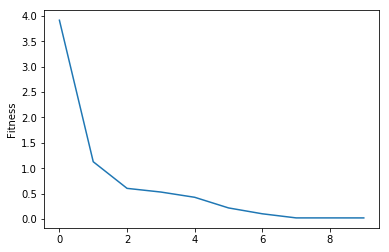

In [27]:
import matplotlib.pyplot as plt

plott = []
for i in range(10):
    plott.append(fitnessPop[i][0])
# print(plott)
plt.plot(plott)
plt.ylabel("Fitness")
plt.show()